In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [22]:
# Загрузка данных
housing_data = pd.read_csv('data/Housing.csv')

# Создание целевой переменной 'price_level' на основе медианы 'price'
housing_data['price_level'] = ['high' if price >= housing_data['price'].median() else 'low' for price in housing_data['price']]

# Кодирование категориальных признаков
housing_data_encoded = pd.get_dummies(housing_data.drop(columns=['price']), drop_first=True)

# Просмотр первых строк данных
housing_data_encoded.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,price_level_low
0,7420,4,2,3,2,True,False,False,False,True,True,False,False,False
1,8960,4,4,4,3,True,False,False,False,True,False,False,False,False
2,9960,3,2,2,2,True,False,True,False,False,True,True,False,False
3,7500,4,2,2,3,True,False,True,False,True,True,False,False,False
4,7420,4,1,2,2,True,True,True,False,True,False,False,False,False


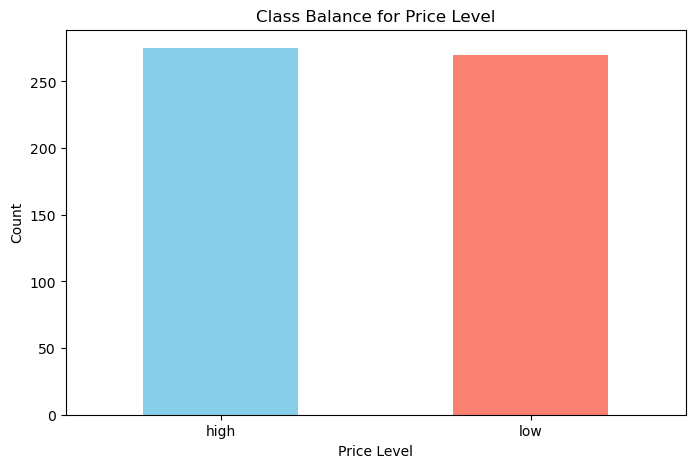

In [23]:
# Визуализация распределения классов
plt.figure(figsize=(8, 5))
housing_data['price_level'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Balance for Price Level')
plt.xlabel('Price Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [24]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = housing_data_encoded.drop(columns=['price_level_low'])
y = housing_data_encoded['price_level_low']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Стандартизация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [26]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Вывод метрик
print("Logistic Regression Metrics:")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Metrics:
[[47 13]
 [ 3 46]]
              precision    recall  f1-score   support

       False       0.94      0.78      0.85        60
        True       0.78      0.94      0.85        49

    accuracy                           0.85       109
   macro avg       0.86      0.86      0.85       109
weighted avg       0.87      0.85      0.85       109



In [27]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Вывод метрик
print("\nSVM Metrics:")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))



SVM Metrics:
[[44 16]
 [ 4 45]]
              precision    recall  f1-score   support

       False       0.92      0.73      0.81        60
        True       0.74      0.92      0.82        49

    accuracy                           0.82       109
   macro avg       0.83      0.83      0.82       109
weighted avg       0.84      0.82      0.82       109



In [28]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Вывод метрик
print("\nKNN Metrics:")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Metrics:
[[42 18]
 [ 6 43]]
              precision    recall  f1-score   support

       False       0.88      0.70      0.78        60
        True       0.70      0.88      0.78        49

    accuracy                           0.78       109
   macro avg       0.79      0.79      0.78       109
weighted avg       0.80      0.78      0.78       109

